# Makes the advection numerics plot for the paper 

First test of moving all the functions to the external scipt




In [6]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndi
from random import random
import matplotlib
from netCDF4 import Dataset
import matplotlib.cm as cm
import matplotlib.pyplot as plt    # The code below assumes this convenient renaming
import math
import seaborn as sns
sns.set()

from binomial_function_collection import *
import sys 
import pandas as pd

In [7]:
random_cmap = func_generate_random_cmap(100)


# Settings  and initialization

# Advection 

Currently trying to redo the plot for the paper with an example that does multiple grid cells advection at the same time. 




In [8]:
#Setup for fance paper plot comparing timesteps, cuts out all non advection related stuff

#--- Grid parameters ----------
nx   = 5     #grid size
ny   = 5
nsiz = 2       #nr of sizes in spectrum
ntim = 10     #nr of timesteps
nage = 1        #dimension of thermal demographics: number of thermal age strata

dx   = 1000.    #x gridspacing     [m]
dy   = 1000.     #y gridspacing     [m]
dsiz = 100.    #width of size bin [m]
dtim = 60.     #time increment    [s]


nage = 1   #demographics: number of object age strata


#--- Advection parameters
u  = dx/60./8. #x wind, used for advection [m/s]
v  = dy/60./8. #y wind, used for advection [m/s]




#--- declare arrays -----------
x    = ( np.array(range(nx  )) + 0.5) * dx
y    = ( np.array(range(ny  )) + 0.5) * dy
siz  = ( np.array(range(nsiz)) + 0.5) * dsiz
tim  = ( np.array(range(ntim)) + 0.5) * dtim

N        = np.zeros( (nx,ny,nsiz,ntim,nage) ).astype(int)    #array containing object number



In [9]:
# setting initial condition for advection, this three different versions of having everything start in the left, then run with three different timesteps

total_t = 12*60
n_small = 1000
n_big = 4

################################################################################################
ntim = 4

dtim = total_t/ntim
ntim = ntim+1
N        = np.zeros( (nx,ny,nsiz,ntim,nage) ).astype(int)    #array containing object number

N[0,0,0,0,0]  = n_small
N[0,0,1,0,0]  = n_big

#time loop
for t in range(ntim-1):
    for l in range(nsiz):
        N[:,:,l,t+1,:] = func_advection_binomial_2D(N[:,:,l,t,:],u*dtim/dx,v*dtim/dy,periodic_flag=False)

N_4 = N+0


################################################################################################
ntim = 2
dtim = total_t/ntim
ntim = ntim+1
N        = np.zeros( (nx,ny,nsiz,ntim,nage) ).astype(int)    #array containing object number

N[0,0,0,0,0]  = n_small
N[0,0,1,0,0]  = n_big

#time loop
for t in range(ntim-1):
    for l in range(nsiz):
        N[:,:,l,t+1,:] = func_advection_binomial_2D(N[:,:,l,t,:],u*dtim/dx,v*dtim/dy)

N_2 = N+0


################################################################################################
ntim = 1
dtim = total_t/ntim
ntim = ntim+1
N      = np.zeros( (nx,ny,nsiz,ntim,nage) ).astype(int)    #array containing object number

N[0,0,0,0,0]  = n_small
N[0,0,1,0,0]  = n_big

#time loop
for t in range(ntim-1):
    for l in range(nsiz):
        N[:,:,l,t+1,:] = func_advection_binomial_2D(N[:,:,l,t,:],u*dtim/dx,v*dtim/dy)

N_1 = N+0

/home/pgriewank/2020-01-binomial-random/binomial_function_collection.py:318: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  axes[0].add_patch(Rectangle((0,0),1,1,edgecolor='k',fill=True,color='r',lw=2,ls='--',alpha=0.3,zorder=0))
/home/pgriewank/2020-01-binomial-random/binomial_function_collection.py:319: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  axes[1].add_patch(Rectangle((0,0),1,1,edgecolor='k',fill=True,color='r',lw=2,ls='--',alpha=0.3,zorder=0))
/home/pgriewank/2020-01-binomial-random/binomial_function_collection.py:320: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  axes[2].add_patch(Rectangle((0,0),1,1,edgecolor='k',fill=True,color='r',lw=2,ls='--',alpha=0.3,zorder=0))


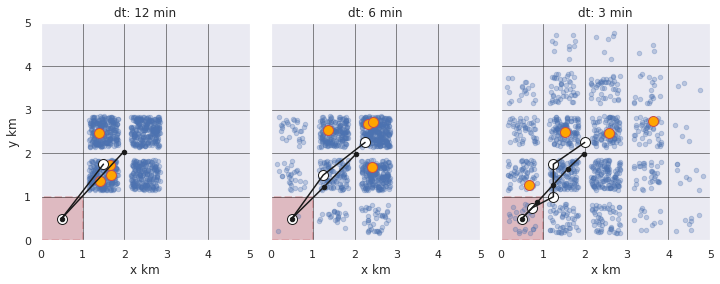

In [10]:
fig = func_advection_numerics_plot(N_1[:,:,:,:,0],N_2[:,:,:,:,0],N_4[:,:,:,:,0])

In [146]:
fig.savefig('plot_advection_0331.pdf',bbox_inches='tight')